1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats 

In [ ]:
x0=15
mu=6.3

#the probability that in a single year are observed 15 or more hurricances.
#p(x>=15) = p(x=15)+p(x>15) = p(x=15)+1-p(x<=15)
p = stats.poisson.pmf(x0, mu)+ 1 - stats.poisson.cdf(x0, mu) 
print('the probability that in a single year are observed 15 or more hurricances is:',p)

the probability that in a single year are observed 15 or more hurricances is: 0.002217122790073134


In [ ]:
#probability that has a Z score of 3 or larger with respect a normal distribution
p_3 = 1. - stats.norm.cdf(3)
print('The probability that has a Z score of 3 or larger with respect a normal distribution is ',p_3)

The probability that has a Z score of 3 or larger with respect a normal distribution is  0.0013498980316301035


The probability that in a single year are observed 15 or more hurricances is larger than the probability that a Z score of 3 or larger with respect a normal distribution so we can retain the null hypothesis.


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [ ]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
sigma_pre = np.sqrt(np.var(pre, ddof=1))
mean_pre=np.mean(pre)

post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
sigma_post = np.sqrt(np.var(post, ddof=1))
mean_post=np.mean(post)

sigma=np.sqrt( ( (sigma_pre**2) + (sigma_post**2) ) / 2 )

n=len(pre)

# the test statistics
T = (mean_pre - mean_post) / (sigma*np.sqrt(2/n))
print("T =", T)
pvalue = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print("p-value =", pvalue)

T = -3.786997938137629
p-value = 0.004302464132864604


p-value < 0.05 so we reject the null hypothesis. Hence, the change in blood pressures within our samples is not statistically significant.

3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

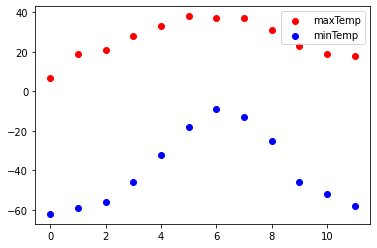

In [ ]:
#Plot these temperatures.
max=[7, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18]
min=[-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]
months=np.arange(12)
plt.scatter(months,max,color='r',label='maxTemp',)
plt.scatter(months,min,color='b',label='minTemp')
plt.legend()

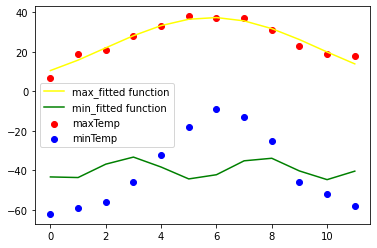

In [ ]:
from scipy import optimize

#Find a suitable function that can describe min and max temperatures.
def f(time,a,b,c,d):
    return a*np.sin(b*time+c)+d

#Fit this function to the data with scipy.optimize.curve_fit().
(a_max,b_max,c_max,d_max),cov=optimize.curve_fit(f,months,max)
plt.scatter(months,max,color='r',label='maxTemp')
plt.plot(months, f(months,a_max,b_max,c_max,d_max), color='yellow', label='max_fitted function')

(a_min,b_min,c_min,d_min),cov=optimize.curve_fit(f,months,min)
plt.scatter(months,min,color='b',label='minTemp')
plt.plot(months, f(months,a_min,b_min,c_min,d_min), color='green', label='min_fitted function')
plt.legend()

The plot is reassuring for the max tempreture as the function reorganizes the way data is distributed. But for the min temperatures the function the fir is not reasonable.

In [ ]:
#Is the time offset for min and max temperatures the same within the fit accuracy?
print(' The time offset for max temperatures:',c_max)
print(' The time offset for min temperatures:',c_min)

 The time offset for max temperatures: 5.502805506491661
 The time offset for min temperatures: 21.127167773485542


The time offset for min and max temperatures is not the same within the fit accuracy

4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

In [ ]:
!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

In [ ]:
import pickle
infile = open('./data/residuals_261.pkl', 'rb')
data = pickle.load(infile)
infile.close()
print(data)

{'residuals': array([ 1.1       , -1.95      , -7.2       , ...,  0.08333333,
        0.16666667,  0.08333333]), 'distances': array([16. ,  6.3,  3.4, ...,  1.7, 19.1,  2.6])}


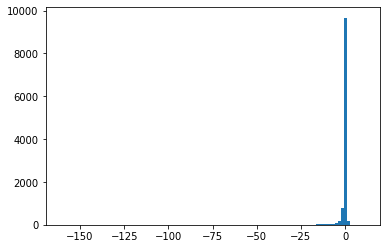

In [ ]:
#Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
residuals=data.item()['residuals']
h, bins, _ = plt.hist(residuals, bins=100, range=(residuals.min(),residuals.max()))

/usr/local/lib/python3.8/dist-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


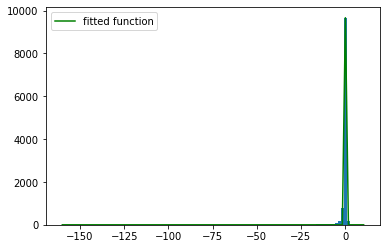

In [ ]:
def f(x, mu, sigma):
    num = np.exp(-(x-mu)**2 / 2 / sigma**2)
    den = np.sqrt(2*np.pi)*sigma
    return num/den

residuals=data.item()['residuals']

h, bins, _ = plt.hist(residuals, bins=100, range=(residuals.min(),residuals.max()))

bin_centers = 0.5*(bins[1:]+bins[:-1])

(mu,sigma),cov=optimize.curve_fit(f,bin_centers,h)


plt.plot(bin_centers, f(bin_centers,mu,sigma), color='green', label='fitted function')
plt.legend()

In [ ]:
#to be able to calculate chi2 we will attribute a very small nubmber to every 0 value else we can't divide numbers on 0
h[h==0]=1e-10
sigma_h=np.sqrt(np.abs(h))

# set the number of degrees of freedom
ndof = len(h) - 1
print("n degrees of freedom =", ndof)

# calculate the chi^2
chi2 = np.sum( ( (h - f(bin_centers,mu,sigma) )**2 ) / sigma_h)
print("chi2 =", chi2)

# calculate the p-value
p_value = 1. - stats.chi2.cdf(chi2, ndof)
print("p-value =", p_value)

n degrees of freedom = 99
chi2 = 28008.166663019783
p-value = 0.0


p-value < 0.05 means that we reject the null hypothesis, therefore our fit function does not represents the data and the fit is not satisfactory.

5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

In [ ]:
!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt

In [ ]:
def f(t,a,b,c):
  return a*np.cos(2*np.pi*t+b)+c

In [ ]:
file_name= "./munich_temperatures_average_with_bad_data.txt"
data = np.loadtxt(file_name)

date_2008_2012= []
temp_2008_2012= []

for date,temp in data:
  if date >= 2008 and date <2013:
    date_2008_2012.append(date)
    temp_2008_2012.append(temp)

date_2008_2012= np.array(date_2008_2012)
temp_2008_2012= np.array(temp_2008_2012)

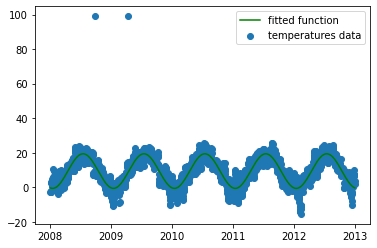

In [ ]:
#Make a plot of the data and the best-fit model in the range 2008 to 2012
(a_f,b_f,c_f),cov=optimize.curve_fit(f,date_2008_2012,temp_2008_2012)
plt.scatter(date_2008_2012,temp_2008_2012,label='temperatures data')
plt.plot(date_2008_2012, f(date_2008_2012,a_f,b_f,c_f), color='green', label='fitted function')
plt.legend()

In [ ]:
Jan=date_2008_2012

In [ ]:
#What is the overall average temperature in Munich
print('The overall average temperature  in Munich is: {:.2f} °C'.format(np.mean(temp_2008_2012)))

#the typical daily average values predicted by the model for the coldest and hottest time of year
print('The typical daily average values predicted by the model for the coldest time of year: {:.2f} °C'.format(f(date_2008_2012,a_f,b_f,c_f).min()))
print('The typical daily average values predicted by the model for the coldest time of year: {:.2f} °C'.format(f(date_2008_2012,a_f,b_f,c_f).max()))


The overall average temperature  in Munich is: 9.35 °C
The typical daily average values predicted by the model for the coldest time of year: -0.67 °C
The typical daily average values predicted by the model for the coldest time of year: 19.37 °C


**What is the meaning of the  b  parameter, and what physical sense does it have?**
The b is called the phase shift or time shift. It represents a horizontal shift of the function along the x-axis, essentially determining the starting point of the oscillation. So, physically, it determines the starting point of the temperature oscillation.


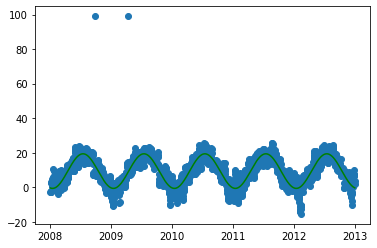

In [ ]:
#fit the data with function g
def g(t,a,b,c,d):
  return a*np.cos(2*np.pi*b*t+c)+d
(a_g,b_g,c_g,d_g),cov=optimize.curve_fit(g,date_2008_2012,temp_2008_2012)
plt.scatter(date_2008_2012,temp_2008_2012)
plt.plot(date_2008_2012, g(date_2008_2012,a_g,b_g,c_g,d_g), color='green', label='fitted function')


In [ ]:
ssr_f = np.sum((f(date_2008_2012,a_f,b_f,c_f)- temp_2008_2012)**2)
ssr_g = np.sum((g(date_2008_2012,a_g,b_g,c_g,d_g) - temp_2008_2012)**2)
print('RSS of f:',ssr_f)
print('RSS of g:',ssr_g)

RSS of f: 40376.57222825893
RSS of g: 40375.27997682827


In [ ]:
alpha = 0.05
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    pval = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("p-value: %.3f" % pval, ", additional parameter necessary:", "YES" if pval < alpha else "NO")
    return pval

ndof_f = 3 - 1
ndof_g = 4 - 1

pval_f_vs_g = Ftest(ssr_f, ssr_g, ndof_f, ndof_g, len(temp_2008_2012), verbose=True)

p-value: 0.809 , additional parameter necessary: NO


==> We don't need the additional parameter